In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [199]:
cell_categories = {
    'CD8_Naive_T_cells': 'Immune Activation and Response',
    'CD8_Transitional_Memory': 'Immune Activation and Response',
    'CD8_Effector_Memory': 'Immune Activation and Response',
    'CD8_Central_Memory': 'Immune Activation and Response',
    'CD4_Effector_Memory': 'Immune Activation and Response',
    'CD4_Naive_T_cells': 'Immune Activation and Response',
    'CD4_Naive_Tregs': 'Immune Activation and Response',
    'CD4_Memory_Tregs': 'Immune Activation and Response',
    'Neutrophils': 'Immune Activation and Response',
    'NKT_cells': 'Immune Activation and Response',
    'MAIT_cells': 'Immune Activation and Response',
    'Eosinophils': 'Immune Activation and Response',
    'Switched_Memory_IgG+': 'Immune Surveillance and Memory',
    'Switched_Memory_IgA+': 'Immune Surveillance and Memory',
    'Non-switched_Memory_IgM_B_cells': 'Immune Surveillance and Memory',
    'Naive_B_cells': 'Immune Surveillance and Memory',
    'B_cells': 'Immune Surveillance and Memory',
    'Immature_NK_cells': 'Natural Killer (NK) Cells',
    'Plasmacytoid_Dendritic_cells': 'Dendritic Cells and Antigen Presentation',
    'cDC1': 'Dendritic Cells and Antigen Presentation',
    'cDC2': 'Dendritic Cells and Antigen Presentation',
    'Total_Dendritic_cells': 'Dendritic Cells and Antigen Presentation',
    'Monocytes_to_Lymphocytes': 'Other',
    'gdT_Vdelta2-': 'Other'
}

In [3]:
df = pd.read_csv('./Task 3/cytometry_data.tsv', sep='\t', index_col='inds')
df['Time point'] = df['Time point'].astype(int)
df['donor_num'] = df['donor_num'].astype(int)
df['response'] = df['response'].astype(int)
df.head()

,Neutrophils,Eosinophils,Basophils,B_cells,T_cells,NKT_cells,NK_cells,Monocytes,Immature_NK_cells,Mature_NK_CD158+_CD57+,...,gdT_Vdelta2+,gdT_Vdelta2-,Naive_B_cells,Non-switched_Memory_IgM_B_cells,Switched_Memory_IgG+,Switched_Memory_IgA+,Switched_Memory_IgA-_IgG-,Time point,response,donor_num
inds,,,,,,,,,,,,,,,,,,,,,
1,61.409675,0.824102,0.343589,3.844453,19.948739,3.557391,2.919137,9.673985,0.166210,0.438825,...,0.010769,0.900482,2.904248,0.242094,0.279949,0.112244,0.086273,1,0,50
2,64.257310,1.040620,0.335715,1.666845,21.829764,2.095258,5.074820,5.437992,0.203931,0.620319,...,0.102681,0.086994,0.883428,0.162517,0.206272,0.068757,0.110428,1,1,100
3,73.598340,3.131417,1.105466,2.299966,6.354818,0.067537,4.075060,9.000547,0.126261,0.807166,...,0.037815,0.001964,1.561853,0.597683,0.046239,0.041672,0.018838,2,0,1
4,75.720771,1.039743,0.455274,2.768982,12.462724,0.274928,2.284924,4.608260,0.087786,0.148657,...,0.284012,0.022831,2.556266,0.055930,0.055930,0.045386,0.005043,1,1,78
5,45.240135,4.228360,1.195060,2.705728,25.813921,0.428603,7.068587,12.689077,0.302709,2.281679,...,0.358324,0.040277,1.734958,0.357482,0.182372,0.176724,0.059715,1,1,81


Посмотрим, сколько контролей и кейсов

In [4]:
df.loc[df['Time point'] == 2, 'response'].value_counts()

response
0    50
1    50
Name: count, dtype: int64

# Фильтрация пропущенных данных

Теперь посмотрим есть ли пропущенные данные и можно ли отфильтровать этих пациентов или надо делать импутацию, если очень много пропущенных и мы потеряем много данных, если их отбросить

In [5]:
df[df.isnull().any(axis=1)]

,Neutrophils,Eosinophils,Basophils,B_cells,T_cells,NKT_cells,NK_cells,Monocytes,Immature_NK_cells,Mature_NK_CD158+_CD57+,...,gdT_Vdelta2+,gdT_Vdelta2-,Naive_B_cells,Non-switched_Memory_IgM_B_cells,Switched_Memory_IgG+,Switched_Memory_IgA+,Switched_Memory_IgA-_IgG-,Time point,response,donor_num
inds,,,,,,,,,,,,,,,,,,,,,
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,30


In [6]:
df.loc[df['donor_num'] == 30].to_numpy()

array([[8.28795521e+01, 1.71395275e+00, 4.95030305e-02, 4.70085200e+00,
        3.92586318e+00, 1.22205858e-02, 1.69356951e+00, 4.58348357e+00,
        2.76364534e-01, 9.56278664e-04, 5.94805329e-01, 1.43441800e-02,
        7.61197816e-01, 1.47300133e-02, 1.33909211e-03, 2.67818423e-02,
        1.04953827e-02, 3.27006139e+00, 5.32265838e-01, 7.70660960e-01,
        4.65741871e-02, 2.65813653e-01, 6.16823990e-01, 5.12316058e-01,
        5.35035174e-01, 2.28948577e-02, 2.55066396e-01, 1.63180222e-01,
        4.25032745e-02, 3.39971856e-01, 4.62580040e-01, 1.34420508e-01,
        4.99728002e-03, 7.99564803e-03, 9.99456004e-03, 4.50630660e+00,
        8.83394907e-02, 1.09183640e-02, 7.94062838e-03, 7.94062838e-03,
        2.00000000e+00, 0.00000000e+00, 3.00000000e+01],
       [           nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
       

лишь 1 пациент оказался с пропущенными данными. У него(ее) нету ни одного заполненой колонки, следовательно, можно его убрать

In [7]:
df = df.loc[df['donor_num'] != 30]
df.head()

,Neutrophils,Eosinophils,Basophils,B_cells,T_cells,NKT_cells,NK_cells,Monocytes,Immature_NK_cells,Mature_NK_CD158+_CD57+,...,gdT_Vdelta2+,gdT_Vdelta2-,Naive_B_cells,Non-switched_Memory_IgM_B_cells,Switched_Memory_IgG+,Switched_Memory_IgA+,Switched_Memory_IgA-_IgG-,Time point,response,donor_num
inds,,,,,,,,,,,,,,,,,,,,,
1,61.409675,0.824102,0.343589,3.844453,19.948739,3.557391,2.919137,9.673985,0.166210,0.438825,...,0.010769,0.900482,2.904248,0.242094,0.279949,0.112244,0.086273,1,0,50
2,64.257310,1.040620,0.335715,1.666845,21.829764,2.095258,5.074820,5.437992,0.203931,0.620319,...,0.102681,0.086994,0.883428,0.162517,0.206272,0.068757,0.110428,1,1,100
3,73.598340,3.131417,1.105466,2.299966,6.354818,0.067537,4.075060,9.000547,0.126261,0.807166,...,0.037815,0.001964,1.561853,0.597683,0.046239,0.041672,0.018838,2,0,1
4,75.720771,1.039743,0.455274,2.768982,12.462724,0.274928,2.284924,4.608260,0.087786,0.148657,...,0.284012,0.022831,2.556266,0.055930,0.055930,0.045386,0.005043,1,1,78
5,45.240135,4.228360,1.195060,2.705728,25.813921,0.428603,7.068587,12.689077,0.302709,2.281679,...,0.358324,0.040277,1.734958,0.357482,0.182372,0.176724,0.059715,1,1,81


In [8]:
df.dropna().shape

(198, 43)

# Фильтрация выбросов

In [9]:
cols_only_predictors = df.columns[~df.columns.isin(['response', 'donor_num', 'Time point'])]
cols_only_predictors

Index(['Neutrophils', 'Eosinophils', 'Basophils', 'B_cells', 'T_cells',
       'NKT_cells', 'NK_cells', 'Monocytes', 'Immature_NK_cells',
       'Mature_NK_CD158+_CD57+', 'Mature_NK_CD158-_CD57+',
       'Mature_NK_CD158+_CD57-', 'Mature_NK_CD158-_CD57-',
       'Plasmacytoid_Dendritic_cells', 'cDC1', 'cDC2',
       'Classical_Monocytes_FceRI+', 'Classical_Monocytes_FceRI-',
       'Non-classical_Monocytes', 'HLA-DR-low_Monocytes', 'CD4_Naive_Tregs',
       'CD4_Memory_Tregs', 'CD4_Naive_T_cells', 'CD4_Central_Memory',
       'CD4_Transitional_Memory', 'CD4_TEMRA', 'CD4_Effector_Memory',
       'CD8_Naive_T_cells', 'CD8_Central_Memory', 'CD8_Transitional_Memory',
       'CD8_TEMRA', 'CD8_Effector_Memory', 'MAIT_cells', 'gdT_Vdelta2+',
       'gdT_Vdelta2-', 'Naive_B_cells', 'Non-switched_Memory_IgM_B_cells',
       'Switched_Memory_IgG+', 'Switched_Memory_IgA+',
       'Switched_Memory_IgA-_IgG-'],
      dtype='object')

In [10]:
rcParams['figure.figsize'] = 12,8

Проверим есть ли выбросы в данных, будем фильтровать вручную без использования IQR или median deviation, так как у нас мало пациентов в датасете

<Axes: >

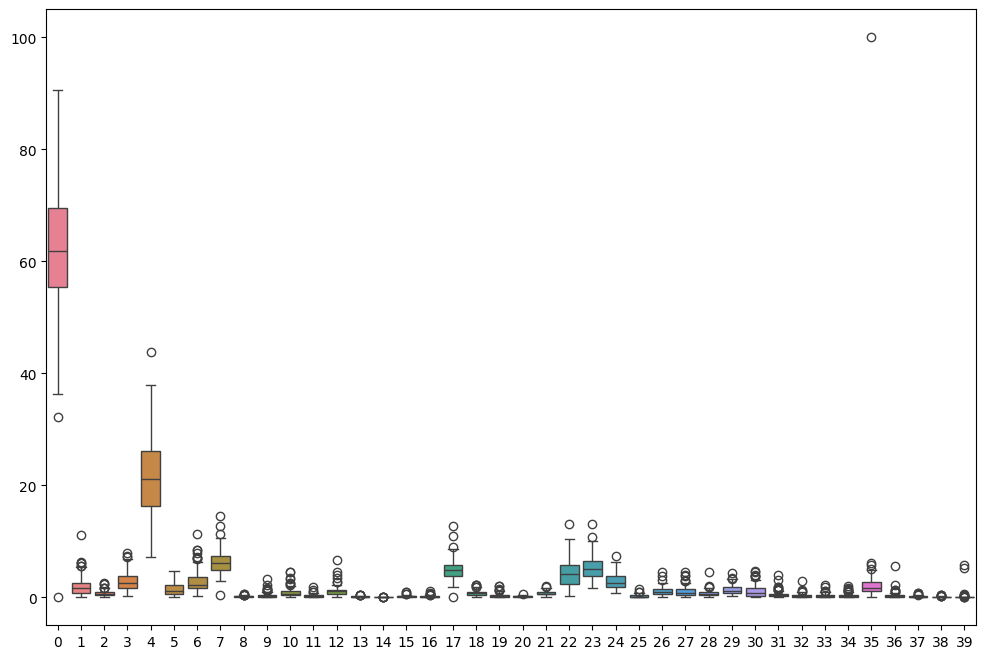

In [11]:
sns.boxplot(df.loc[df['Time point'] == 1, cols_only_predictors].to_numpy())

Откровенных выбросов два, один на 0 позиции (снизу, значении близко к 0), второй на 35 (значение блико к 100). Учитывая, что у нас данны проценты от популяций это довольно подозрительные значений, отфильтруем их

In [12]:
(df.iloc[:,0].name, df.iloc[:,35].name)

('Neutrophils', 'Naive_B_cells')

In [13]:
df.loc[df['Time point'] == 1, 'response'].value_counts()

response
1    50
0    49
Name: count, dtype: int64

In [14]:
df.loc[(df['Time point'] == 1) & (df.iloc[:, 35] > 80), ['donor_num', 'response']]

,donor_num,response
inds,,
193,33,0


In [15]:
df.loc[(df['Time point'] == 1) & (df.iloc[:, 0] < 1), ['donor_num', 'response']]

,donor_num,response
inds,,
91,56,1


отфильтруем этих пациентов из выборки

In [16]:
df = df.loc[~df['donor_num'].isin([56, 33])]
df.head()

,Neutrophils,Eosinophils,Basophils,B_cells,T_cells,NKT_cells,NK_cells,Monocytes,Immature_NK_cells,Mature_NK_CD158+_CD57+,...,gdT_Vdelta2+,gdT_Vdelta2-,Naive_B_cells,Non-switched_Memory_IgM_B_cells,Switched_Memory_IgG+,Switched_Memory_IgA+,Switched_Memory_IgA-_IgG-,Time point,response,donor_num
inds,,,,,,,,,,,,,,,,,,,,,
1,61.409675,0.824102,0.343589,3.844453,19.948739,3.557391,2.919137,9.673985,0.166210,0.438825,...,0.010769,0.900482,2.904248,0.242094,0.279949,0.112244,0.086273,1,0,50
2,64.257310,1.040620,0.335715,1.666845,21.829764,2.095258,5.074820,5.437992,0.203931,0.620319,...,0.102681,0.086994,0.883428,0.162517,0.206272,0.068757,0.110428,1,1,100
3,73.598340,3.131417,1.105466,2.299966,6.354818,0.067537,4.075060,9.000547,0.126261,0.807166,...,0.037815,0.001964,1.561853,0.597683,0.046239,0.041672,0.018838,2,0,1
4,75.720771,1.039743,0.455274,2.768982,12.462724,0.274928,2.284924,4.608260,0.087786,0.148657,...,0.284012,0.022831,2.556266,0.055930,0.055930,0.045386,0.005043,1,1,78
5,45.240135,4.228360,1.195060,2.705728,25.813921,0.428603,7.068587,12.689077,0.302709,2.281679,...,0.358324,0.040277,1.734958,0.357482,0.182372,0.176724,0.059715,1,1,81


In [17]:
df.shape

(194, 43)

<Axes: >

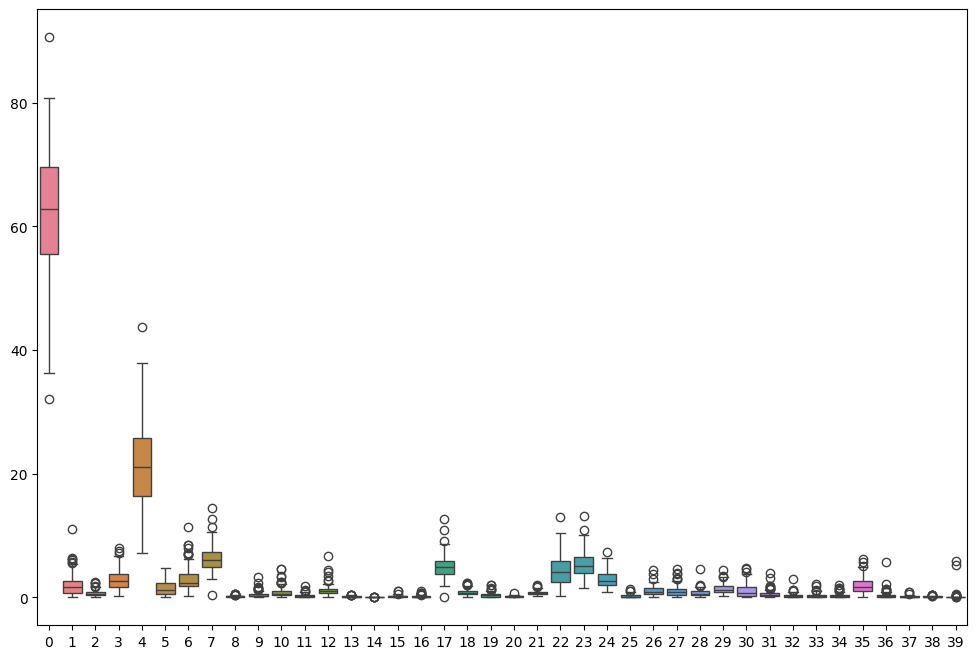

In [18]:
sns.boxplot(df.loc[df['Time point'] == 1, cols_only_predictors].to_numpy())

проверим как изменелось сотноошение кейсов и контролей

In [19]:
df.loc[df['Time point'] == 1, 'response'].value_counts()

response
1    49
0    48
Name: count, dtype: int64

видно, чтоб фильтрация пропущенных данных и выбросов не исказила сильно это соотношение

# Анализ ассоциаций предикторов из первой точки

Разделим людей по двум датасетам, в зависимости от временной точки, для удобства дальнейшего анализа

In [20]:
df1 = df.loc[df['Time point'] == 1].sort_values(by='donor_num')
df1 = df1.loc[:, ~df1.columns.isin(['Time point'])]
df2 = df.loc[df['Time point'] == 2].sort_values(by='donor_num')
df2 = df2.loc[:, ~df2.columns.isin(['Time point'])]
(df1.shape, df2.shape)

((97, 42), (97, 42))

Сначала добавим еще предикторы, объединив какие-то фичи или посчитав отношения одних к другим. TODO описать подробнее

Объединив некоторые типы клеток вместе можно упростить анализ, а также проверить то, насколько группы клеток ассоциированы с ответом на лечение
<ol>
<li> Total T-cells - измерить скоордированный ответ имунной системы </li>
<li> Memory_T_cells - обеспечивают долгосрочный иммунный контроль, т.е. позволяют быстре реагировать на возникшие заново опухолевые антигены.</li>
<li> Total_NK_cells - являются частью врожденной иммунной системы, т.е. могут быстро реагировать на опухолевые клетки</li>
<li> Total_Monocytes - могут дифференцироваться в macrophages and dendritic cell, что полезно для ответа имунной системы </li>
<li> Total_Dendritic_cells - важны для ответа адаптивной иммуной систем, так как они активируют Т клетки и представляют им антиген.</li>
</ol>

Для оценки взаимодействия клеток между собой также посчитаем соотношение некоторых клеток между собой

Объединив некоторые типы клеток вместе можно упростить анализ, а также проверить то, насколько группы клеток ассоциированы с ответом на лечение
<ol>
<li> T_cells_to_B_cells </li>
<li> CD4_to_CD8_T_cells - соотношение helper and cytotoxic T cells.</li>
<li> Effector_Memory_to_Naive_T_cells - проверить на ассоциацию долю обученных клеток к naive</li>
<li> NK_cells_to_Total_Lymphocytes - NK-клетки обеспечивают быстрый ответ на опухоли, поэтому важно посмотреть на корреляцию с ранним успехом лечения. </li>
<li> Monocytes_to_Lymphocytes - Доля моноцитов может отражать общее состояние воспаления.</li>
</ol>

In [ ]:
def transform_cols(dataset : pd.DataFrame) :
  # combined cell type features
  # Total T cells
  dataset['Total_T_cells'] = (dataset['CD4_Naive_T_cells']  + dataset['CD4_Central_Memory']  + dataset['CD4_Transitional_Memory'] +
                              dataset['CD4_TEMRA']          + dataset['CD4_Effector_Memory'] + dataset['CD8_Naive_T_cells'] +
                              dataset['CD8_Central_Memory'] + dataset['CD8_Transitional_Memory'] + dataset['CD8_TEMRA'] +
                              dataset['CD8_Effector_Memory'])

  # Total NK cells
  dataset['Total_NK_cells'] = (dataset['Immature_NK_cells'] + dataset['Mature_NK_CD158+_CD57+'] + dataset['Mature_NK_CD158-_CD57+'] +
                            dataset['Mature_NK_CD158+_CD57-'] + dataset['Mature_NK_CD158-_CD57-'])

  # Total Monocytes
  dataset['Total_Monocytes'] = (dataset['Classical_Monocytes_FceRI+'] + dataset['Classical_Monocytes_FceRI-'] +
                             dataset['Non-classical_Monocytes'] + dataset['HLA-DR-low_Monocytes'])

  # Memory T cells
  dataset['Memory_T_cells'] = (dataset['CD4_Central_Memory'] + dataset['CD4_Transitional_Memory'] + dataset['CD4_Effector_Memory'] +
                            dataset['CD8_Central_Memory'] + dataset['CD8_Transitional_Memory'] + dataset['CD8_Effector_Memory'])

  # Total Dendritic cells
  dataset['Total_Dendritic_cells'] = (dataset['Plasmacytoid_Dendritic_cells'] + dataset['cDC1'] + dataset['cDC2'])

  # ratios
  # T cells to B cells
  dataset['T_cells_to_B_cells'] = dataset['Total_T_cells'] / dataset['B_cells']

  # CD4+ to CD8+ T cells
  dataset['CD4_to_CD8_T_cells'] = (
      (dataset['CD4_Naive_T_cells'] + dataset['CD4_Central_Memory'] + dataset['CD4_Transitional_Memory'] +
       dataset['CD4_TEMRA'] + dataset['CD4_Effector_Memory']) /
      (dataset['CD8_Naive_T_cells'] + dataset['CD8_Central_Memory'] + dataset['CD8_Transitional_Memory'] +
       dataset['CD8_TEMRA'] + dataset['CD8_Effector_Memory'])
  )

  # Effector Memory to Naive T cells
  dataset['Effector_Memory_to_Naive_T_cells'] = (
      (dataset['CD4_Effector_Memory'] + dataset['CD8_Effector_Memory']) /
      (dataset['CD4_Naive_T_cells'] + dataset['CD8_Naive_T_cells'])
  )

  # NK cells to Total Lymphocytes
  dataset['NK_cells_to_Total_Lymphocytes'] = dataset['Total_NK_cells'] / (dataset['Total_T_cells'] + dataset['B_cells'] + dataset['Total_NK_cells'])

  # Monocytes to Lymphocytes
  dataset['Monocytes_to_Lymphocytes'] = dataset['Total_Monocytes'] / (dataset['Total_T_cells'] + dataset['B_cells'] + dataset['Total_NK_cells'])

Посчитаем доп фичи для данных с обоих временных точек

In [ ]:
transform_cols (df1)
transform_cols (df2)

#  1. Feature importance analysis (Основное задание)

## Оценка предикторов из первой точки

In [23]:
cols_only_predictors = list(cols_only_predictors) + ['Total_T_cells',
       'Total_NK_cells', 'Total_Monocytes', 'Memory_T_cells',
       'Total_Dendritic_cells', 'T_cells_to_B_cells', 'CD4_to_CD8_T_cells',
       'Effector_Memory_to_Naive_T_cells', 'NK_cells_to_Total_Lymphocytes',
       'Monocytes_to_Lymphocytes']
cols_only_predictors = np.array(cols_only_predictors)
cols_only_predictors

array(['Neutrophils', 'Eosinophils', 'Basophils', 'B_cells', 'T_cells',
       'NKT_cells', 'NK_cells', 'Monocytes', 'Immature_NK_cells',
       'Mature_NK_CD158+_CD57+', 'Mature_NK_CD158-_CD57+',
       'Mature_NK_CD158+_CD57-', 'Mature_NK_CD158-_CD57-',
       'Plasmacytoid_Dendritic_cells', 'cDC1', 'cDC2',
       'Classical_Monocytes_FceRI+', 'Classical_Monocytes_FceRI-',
       'Non-classical_Monocytes', 'HLA-DR-low_Monocytes',
       'CD4_Naive_Tregs', 'CD4_Memory_Tregs', 'CD4_Naive_T_cells',
       'CD4_Central_Memory', 'CD4_Transitional_Memory', 'CD4_TEMRA',
       'CD4_Effector_Memory', 'CD8_Naive_T_cells', 'CD8_Central_Memory',
       'CD8_Transitional_Memory', 'CD8_TEMRA', 'CD8_Effector_Memory',
       'MAIT_cells', 'gdT_Vdelta2+', 'gdT_Vdelta2-', 'Naive_B_cells',
       'Non-switched_Memory_IgM_B_cells', 'Switched_Memory_IgG+',
       'Switched_Memory_IgA+', 'Switched_Memory_IgA-_IgG-',
       'Total_T_cells', 'Total_NK_cells', 'Total_Monocytes',
       'Memory_T_cells', 'To

Проанализируем ассоциацию предикторов с тем будет ли пациент ответчиком или нет. Будем использовать hypothesis testing и однокомпонентную логистическую регрессии (из sklearn - auc, statsmodels - wald test) и XGBClassifier. Для логистической регресии из statsmodels будем использовать коэффициенты из sklearn, так как там можно применить регурализацию, что позволяет нам уменьшить вероятность переобучения модели. Сравним результаты разных алгоритмов для вывода наилучших предикторов

In [24]:
import statsmodels.api as sm
from sklearn.feature_selection import f_classif
from scipy.stats import kstest, ttest_ind, mannwhitneyu
import statsmodels.stats.multitest as smm

def check_norm (dataset, col) :
    m = dataset[col].mean()
    sig = dataset[col].std()
    yt = dataset[col].dropna()
    yt = (yt - m) / sig

    return kstest(yt, 'norm').pvalue

def calculate_hypothesis_test_stats (dataset) :   
    X = dataset.drop(columns=['response', 'donor_num'])
    y = dataset['response']
    group_1 = X[y == 0]
    group_2 = X[y == 1]

    results = []

    for column in X.columns:
        is_normal = check_norm(X, column) > 0.05
        if is_normal:
            stat, p_value = ttest_ind(group_1[column], group_2[column])
            test_type = 'T-Test'
        else:
            stat, p_value = mannwhitneyu(group_1[column], group_2[column])
            test_type = 'Wilcoxon Test'

        results.append({
            'Feature': column,
            'Test Type': test_type,
            'Statistic': stat,
            'P-Value': p_value
        })
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='P-Value')
    return (results_df)

def calculate_anova_stats(dataset) :
    x_cols = dataset.drop (columns=['response', 'donor_num'])
    f_values, p_values = f_classif (x_cols, dataset['response'])
    anova_results = pd.DataFrame({
        'Feature': x_cols.columns,
        'F-Value': f_values,
        'P-Value': p_values
    })
    anova_results = anova_results.sort_values(by='P-Value')
    return (anova_results)

def calculate_importance_by_regr (dataset, cols) :
    res = {
        'name' : [],
        'coeff' : [],
        'p-value' : []
    }

    Y = dataset['response']
    for col in cols :
        logistic_model = LogisticRegression(penalty='l2', solver='liblinear')
        logistic_model.fit(dataset[col].to_numpy().reshape(-1, 1), Y)
        logistic_coefficients = logistic_model.coef_[0]
        logistic_intercept = logistic_model.intercept_[0]

        X = sm.add_constant(dataset[col])
        logit_statsmodels_model = sm.Logit(Y, X).fit(disp=0)
        logit_statsmodels_model.params[:1] = logistic_intercept 
        logit_statsmodels_model.params[1:] = logistic_coefficients  

        res['name'].append(col)
        res['coeff'].append(logit_statsmodels_model.params.loc[col])
        res['p-value'].append(logit_statsmodels_model.pvalues.loc[col])
    return pd.DataFrame (res)

In [25]:
def calculate_glm_scores (dataset) :
    y = dataset['response'].to_numpy()
    res = {
        'name' : [],
        'coeff' : [],
        'p-value' : []
    }
    for col in cols_only_predictors:
        x = dataset.loc[:, cols_only_predictors]
        x = sm.add_constant(x[col], prepend=False)
        glm_binom = sm.GLM(y, x, family=sm.families.Binomial()).fit()
        res['name'].append (col)
        res['coeff'].append (glm_binom.params.loc[col])
        res['p-value'].append (glm_binom.pvalues.loc[col])
    res = pd.DataFrame(res)
    return res.sort_values(by='p-value')

попробуем использовать биномиальную регрессию

In [26]:
df1_glm_scores = calculate_glm_scores (df1)
df1_glm_scores.head(7)

,name,coeff,p-value
28,CD8_Central_Memory,1.574957,0.004650
15,cDC2,-4.226524,0.013594
44,Total_Dendritic_cells,-2.333143,0.026608
18,Non-classical_Monocytes,-1.112529,0.030841
49,Monocytes_to_Lymphocytes,-3.732377,0.049092
12,Mature_NK_CD158-_CD57-,-0.413308,0.133738
42,Total_Monocytes,-0.138251,0.174946


а также FDR для поправки на множественную проверку гипотез

In [27]:
reject, pvals_corrected, _, _ = smm.multipletests(df1_glm_scores['p-value'], alpha=0.05, method='fdr_bh')
df1_glm_scores.loc[reject, 'name'].to_numpy()

array([], dtype=object)

здесь мы не нашли значимых фичей

теперь попробуем использовать логистическую регрессию из statsmodels, куда подставим коэффициенты из sklearn logistic regression, так как в statsmodels отсуствует регурялизация в качестве параметра. Так мы уменьшим шанс того, что модель скорее всего переобучится

In [28]:
df1_regr_pvalues = calculate_importance_by_regr(df1, cols_only_predictors).sort_values(by='p-value')
df1_regr_pvalues.head()

,name,coeff,p-value
28,CD8_Central_Memory,1.114864,0.045124
18,Non-classical_Monocytes,-0.795474,0.122637
12,Mature_NK_CD158-_CD57-,-0.353787,0.199291
44,Total_Dendritic_cells,-1.115301,0.289197
10,Mature_NK_CD158-_CD57+,0.261348,0.292021


In [29]:
reject, pvals_corrected, _, _ = smm.multipletests(df1_regr_pvalues['p-value'], alpha=0.05, method='fdr_bh')
df1_regr_pvalues.loc[reject, 'name'].to_numpy()

array([], dtype=object)

как видно здесь также нет результатов, но самым значимым является CD8_Central_Memory

In [30]:
df1_anova_stats = calculate_anova_stats (df1)
df1_anova_stats.head(7)

,Feature,F-Value,P-Value
28,CD8_Central_Memory,8.903428,0.003618
15,cDC2,7.359093,0.007922
44,Total_Dendritic_cells,5.652219,0.019437
18,Non-classical_Monocytes,5.234780,0.024357
49,Monocytes_to_Lymphocytes,4.222317,0.042641
12,Mature_NK_CD158-_CD57-,2.563153,0.112701
36,Non-switched_Memory_IgM_B_cells,2.278309,0.134514


In [31]:
reject, pvals_corrected, _, _ = smm.multipletests(df1_anova_stats['P-Value'], alpha=0.05, method='fdr_bh')
df1_anova_stats.loc[reject, 'Feature'].to_numpy()

array([], dtype=object)

на тесте ANOVA, результаты примерно такие же

In [32]:
df1_tests_stats = calculate_hypothesis_test_stats (df1)
df1_tests_stats.head(7)

,Feature,Test Type,Statistic,P-Value
28,CD8_Central_Memory,Wilcoxon Test,737.000000,0.001556
15,cDC2,T-Test,2.712765,0.007922
44,Total_Dendritic_cells,T-Test,2.377440,0.019437
18,Non-classical_Monocytes,T-Test,2.287964,0.024357
49,Monocytes_to_Lymphocytes,T-Test,2.054828,0.042641
39,Switched_Memory_IgA-_IgG-,Wilcoxon Test,940.000000,0.089278
14,cDC1,T-Test,1.393038,0.166860


In [33]:
reject, pvals_corrected, _, _ = smm.multipletests(df1_tests_stats['P-Value'], alpha=0.05, method='fdr_bh')
df1_tests_stats.loc[reject, 'Feature'].to_numpy()

array([], dtype=object)

здесь примерно такие же результаты

Так как различного рода тесты, совместно с коррекцией BH, не дали нам результата, попробуем использовать AUC score в качестве метрики <br>
Тут мы будем использовать AUC в качестве метрики, а в качестве моделей возьмем Logistic Regression и XGBClassifier, так как они наиболее устойчивы к переобучению на датасетах с малым количеством данных <br>

Для каждого предиктора будем строить однокомпонентную модель на классификацию респодентов

In [237]:
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
#from sklearn.utils import ignore_warnings
#from sklearn.exceptions import ConvergenceWarning

def evaluate_model (dataset : pd.DataFrame, model, x, y) :
    n_iterations = 10
    auc_bootstrap = []
    
    for i in range(n_iterations):
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
        auc_score = cross_val_score(model, x, y, cv=cv, scoring='roc_auc').mean()
        auc_bootstrap.append(auc_score)

    alpha = 0.95
    lower = round (np.percentile(auc_bootstrap, (1 - alpha) / 2 * 100), 4)
    upper = round (np.percentile(auc_bootstrap, (1 + alpha) / 2 * 100), 4)
    return (np.mean(auc_bootstrap), lower, upper)

def get_best_params (mod, X, y, param_grid) :
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(mod(), param_grid, cv=cv, n_jobs=-1, verbose=0, scoring='roc_auc')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_
    return best_params
    
#@ignore_warnings(category=ConvergenceWarning)
def estimate_predictors_importance(dataset, method, param_grid) :
    metric_res = {
        'name' : [],
        'coeff' : [],
        'metric' : [],
        'ci' : []
    }
    X = dataset.drop(columns=['response', 'donor_num'])
    y = dataset['response']

    mod = None
    for col in tqdm(X.columns) :
        x_col = X[col]
        if (method == 'log') :
            best_params = get_best_params (LogisticRegression, X[col].to_numpy().reshape(-1, 1), y, param_grid)
            mod = LogisticRegression(penalty = best_params['penalty'],
                                     solver= best_params['solver'],
                                     C = best_params['C'])
        elif (method == 'xgb'):
            best_params = get_best_params (XGBClassifier, X[col].to_numpy().reshape(-1, 1), y, param_grid)
            mod = XGBClassifier(n_estimators=best_params['n_estimators'],
                                learning_rate = best_params['learning_rate'],
                                min_child_weight = best_params['min_child_weight'],
                                gamma = best_params['gamma'],
                                reg_alpha = best_params['reg_alpha'],
                                reg_lambda = best_params['reg_lambda'],
                                random_state=42)
        
        metric_res['name'].append (col)
        auc, lower, upper = evaluate_model (dataset, mod, x_col.to_numpy().reshape(-1, 1), y)
        metric_res['metric'].append (auc)
        metric_res['ci'].append ((lower, upper))
        mod.fit(x_col.to_numpy().reshape(-1, 1), y)
        if method == 'xgb' :
            mod_coef = mod.feature_importances_[0]
        else :
            mod_coef = mod.coef_[0][0]
        metric_res['coeff'].append (mod_coef)
        
    return pd.DataFrame(metric_res) 

In [158]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [1.0, 1.5, 2.0]
}

In [180]:
xgb_auc_df1 = estimate_predictors_importance (df1, 'xgb', xgb_param_grid).sort_values(by='metric', ascending=False)
xgb_auc_df1.head(7)

 50%|█████     | 25/50 [1:22:15<4:27:00, 640.81s/it]29281.50s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
29282.47s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
29283.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
29284.31s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
29285.22s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
29286.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
29287.02s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
 66%|██████▌   | 33/50 [2:55:17<3:41:09, 780.56s/it]34863.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
34864.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
34865.52s - pydevd: Sending mess

,name,coeff,metric,ci
28,CD8_Central_Memory,1.0,0.662989,"(0.6471, 0.6859)"
39,Switched_Memory_IgA-_IgG-,1.0,0.655544,"(0.6043, 0.7045)"
23,CD4_Central_Memory,1.0,0.619622,"(0.5785, 0.6714)"
44,Total_Dendritic_cells,1.0,0.614156,"(0.5654, 0.6498)"
27,CD8_Naive_T_cells,1.0,0.608633,"(0.5674, 0.6373)"
15,cDC2,1.0,0.601322,"(0.5678, 0.6331)"
4,T_cells,1.0,0.600044,"(0.5602, 0.6378)"


In [220]:
xgb_best_scores_df1 = xgb_auc_df1.loc[np.array([pair[0]  for pair in xgb_auc_df1['ci']]) > 0.51]
xgb_best_cols_df1 = xgb_best_scores_df1['name'].to_numpy()
xgb_best_scores_df1

,name,coeff,metric,ci
28,CD8_Central_Memory,1.0,0.662989,"(0.6471, 0.6859)"
39,Switched_Memory_IgA-_IgG-,1.0,0.655544,"(0.6043, 0.7045)"
23,CD4_Central_Memory,1.0,0.619622,"(0.5785, 0.6714)"
44,Total_Dendritic_cells,1.0,0.614156,"(0.5654, 0.6498)"
27,CD8_Naive_T_cells,1.0,0.608633,"(0.5674, 0.6373)"
15,cDC2,1.0,0.601322,"(0.5678, 0.6331)"
4,T_cells,1.0,0.600044,"(0.5602, 0.6378)"
20,CD4_Naive_Tregs,1.0,0.596133,"(0.5554, 0.6348)"
49,Monocytes_to_Lymphocytes,1.0,0.593278,"(0.5589, 0.6133)"
33,gdT_Vdelta2+,1.0,0.592533,"(0.5481, 0.6261)"


In [221]:
xgb_best_cols_df1

array(['CD8_Central_Memory', 'Switched_Memory_IgA-_IgG-',
       'CD4_Central_Memory', 'Total_Dendritic_cells', 'CD8_Naive_T_cells',
       'cDC2', 'T_cells', 'CD4_Naive_Tregs', 'Monocytes_to_Lymphocytes',
       'gdT_Vdelta2+', 'Switched_Memory_IgG+', 'Total_Monocytes',
       'Monocytes', 'Plasmacytoid_Dendritic_cells', 'CD4_to_CD8_T_cells',
       'Total_T_cells', 'CD4_TEMRA'], dtype=object)

In [159]:
log_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced']
}

In [177]:
import warnings
warnings.filterwarnings("ignore")
log_auc_df1 = estimate_predictors_importance (df1, 'log', log_param_grid).sort_values(by='metric', ascending=False)


  0%|          | 0/50 [00:00<?, ?it/s]/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packag

In [178]:
log_auc_df1.head(7)

,name,coeff,metric,ci
28,CD8_Central_Memory,0.071169,0.685044,"(0.6663, 0.6984)"
15,cDC2,-0.019509,0.653067,"(0.6365, 0.6685)"
44,Total_Dendritic_cells,-0.024176,0.629222,"(0.6056, 0.644)"
14,cDC1,-0.000730,0.613267,"(0.6029, 0.6226)"
49,Monocytes_to_Lymphocytes,-0.010568,0.602044,"(0.5868, 0.6232)"
18,Non-classical_Monocytes,-0.039764,0.597111,"(0.5806, 0.6174)"
13,Plasmacytoid_Dendritic_cells,-0.005073,0.580178,"(0.5555, 0.604)"


In [222]:
log_best_scores_df1 = log_auc_df1.loc[np.array([pair[0]  for pair in log_auc_df1['ci']]) > 0.51]
log_best_cols_df1 = log_best_scores_df1['name'].to_numpy()
log_best_scores_df1

,name,coeff,metric,ci
28,CD8_Central_Memory,0.071169,0.685044,"(0.6663, 0.6984)"
15,cDC2,-0.019509,0.653067,"(0.6365, 0.6685)"
44,Total_Dendritic_cells,-0.024176,0.629222,"(0.6056, 0.644)"
14,cDC1,-0.000730,0.613267,"(0.6029, 0.6226)"
49,Monocytes_to_Lymphocytes,-0.010568,0.602044,"(0.5868, 0.6232)"
18,Non-classical_Monocytes,-0.039764,0.597111,"(0.5806, 0.6174)"
13,Plasmacytoid_Dendritic_cells,-0.005073,0.580178,"(0.5555, 0.604)"
36,Non-switched_Memory_IgM_B_cells,0.043241,0.578489,"(0.5555, 0.6008)"
38,Switched_Memory_IgA+,0.005567,0.575867,"(0.5528, 0.6022)"
12,Mature_NK_CD158-_CD57-,-0.045482,0.567822,"(0.5365, 0.5915)"


In [223]:
log_best_cols_df1

array(['CD8_Central_Memory', 'cDC2', 'Total_Dendritic_cells', 'cDC1',
       'Monocytes_to_Lymphocytes', 'Non-classical_Monocytes',
       'Plasmacytoid_Dendritic_cells', 'Non-switched_Memory_IgM_B_cells',
       'Switched_Memory_IgA+', 'Mature_NK_CD158-_CD57-', 'MAIT_cells'],
      dtype=object)

Попробуем узнать какие предикторы являются значимыми для классификации респодентов и не респодентов на лечение

In [224]:
set(log_best_cols_df1) & set(xgb_best_cols_df1)

{'CD8_Central_Memory',
 'Monocytes_to_Lymphocytes',
 'Plasmacytoid_Dendritic_cells',
 'Total_Dendritic_cells',
 'cDC2'}

Plasmacytoid_Dendritic_cells, Total_Dendritic_cells, cDC2 являются дендрическими клетками. Посмотрим как они распределены у пациентов, при стратификации по респоденсту/не респоденту

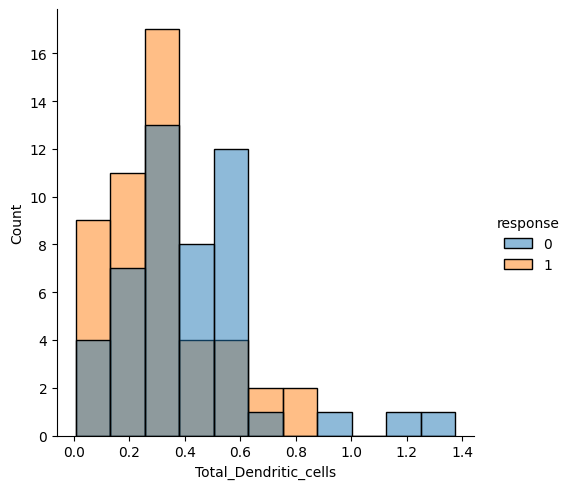

In [225]:
sns.displot(df1, x='Total_Dendritic_cells', hue='response')

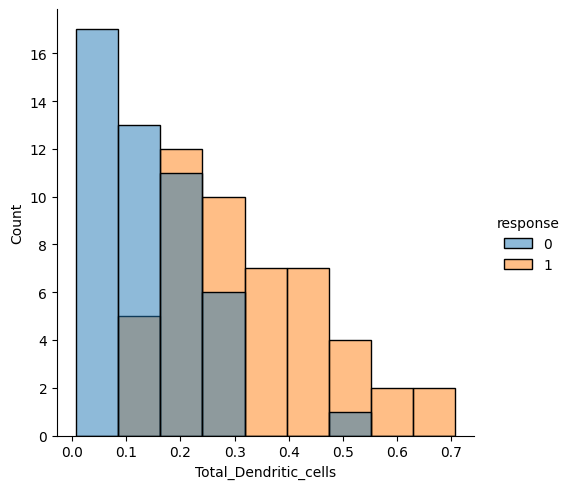

In [236]:
sns.displot(df2, x='Total_Dendritic_cells', hue='response')

Можно заметить, что у ответчиком, изначально популяция дендрических клеток была меньше, чем у не ответчиков. Возможно, лекарственная терапия могла изменить иммунную среду, что привело к увеличению количества дендритных клеток у респондеров. Это может улучшить презентацию антигена и последующую активацию Т-клеток. К примеру тех же самых CD8 Central Memory, которая также оказалась значимым предиктором

## Оценка динамики в качестве предикторов

Здесь будем проверять гипотезы, что увелечение или уменьшение популяции определенной клетки или группы клеток будут больше коррелировать с положиельным ответом на лечение. <br>

Для того, чтобы получить динамику, отсортируем и первой и второй датасет по номеру, а затем вычтем данные второй точки из первой. Разделим пациентов по тем, у кого динамика на увелечение размера популяции, и на неувелечение

Проверим, что в каждом датасете есть пациент из другого датасета

In [152]:
df2.sort_values(by='donor_num')['donor_num'].to_numpy() - df1.sort_values(by='donor_num')['donor_num'].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [153]:
df_final = pd.DataFrame(df2.sort_values(by='donor_num').loc[:, cols_only_predictors].to_numpy() -\
                         df1.sort_values(by='donor_num').loc[:, cols_only_predictors].to_numpy())
df_final.columns = cols_only_predictors
df_final['response'] = df2.sort_values(by='donor_num')['response'].to_numpy()
df_final['donor_num'] = df2.sort_values(by='donor_num')['donor_num'].to_numpy()
df_final = (df_final > 0) + 0
df_final.head()

,Neutrophils,Eosinophils,Basophils,B_cells,T_cells,NKT_cells,NK_cells,Monocytes,Immature_NK_cells,Mature_NK_CD158+_CD57+,...,Total_Monocytes,Memory_T_cells,Total_Dendritic_cells,T_cells_to_B_cells,CD4_to_CD8_T_cells,Effector_Memory_to_Naive_T_cells,NK_cells_to_Total_Lymphocytes,Monocytes_to_Lymphocytes,response,donor_num
0,1,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,1,0,1
1,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,1,1,0,1
2,1,1,1,0,0,0,0,1,0,0,...,1,0,0,1,0,1,1,1,0,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,1,1,0,1
4,1,0,1,0,0,0,1,1,1,1,...,1,0,0,1,1,1,1,1,0,1


Проведем все те же тесты, что и для данных из первой точки

In [154]:
dynamic_scores_glm = calculate_glm_scores (df_final)
dynamic_scores_glm

,name,coeff,p-value
0,Neutrophils,-3.768017,0.000001
44,Total_Dendritic_cells,2.608521,0.000003
29,CD8_Transitional_Memory,2.995732,0.000006
22,CD4_Naive_T_cells,2.439444,0.000011
15,cDC2,2.602690,0.000013
20,CD4_Naive_Tregs,2.139225,0.000020
26,CD4_Effector_Memory,2.356557,0.000020
27,CD8_Naive_T_cells,2.066196,0.000021
28,CD8_Central_Memory,2.748872,0.000032
13,Plasmacytoid_Dendritic_cells,1.897120,0.000086


FDR для множественного теста

In [189]:
reject, pvals_corrected, _, _ = smm.multipletests(dynamic_scores_glm['p-value'], alpha=0.05, method='fdr_bh')
dynamic_glm_best_cols = dynamic_scores_glm.loc[reject, 'name'].to_numpy()
dynamic_glm_best_cols

array(['Neutrophils', 'Total_Dendritic_cells', 'CD8_Transitional_Memory',
       'CD4_Naive_T_cells', 'cDC2', 'CD4_Naive_Tregs',
       'CD4_Effector_Memory', 'CD8_Naive_T_cells', 'CD8_Central_Memory',
       'Plasmacytoid_Dendritic_cells', 'CD8_Effector_Memory',
       'Monocytes_to_Lymphocytes', 'MAIT_cells', 'CD4_Memory_Tregs',
       'Switched_Memory_IgG+', 'Eosinophils', 'Switched_Memory_IgA+',
       'Non-switched_Memory_IgM_B_cells', 'cDC1', 'Naive_B_cells',
       'B_cells', 'NKT_cells', 'gdT_Vdelta2-', 'Immature_NK_cells',
       'HLA-DR-low_Monocytes', 'CD4_TEMRA', 'CD8_TEMRA', 'gdT_Vdelta2+',
       'Switched_Memory_IgA-_IgG-'], dtype=object)

In [191]:
dynamic_scores_ridge = calculate_importance_by_regr(df_final, cols_only_predictors).sort_values(by='p-value')
dynamic_scores_ridge

,name,coeff,p-value
44,Total_Dendritic_cells,2.008584,0.000304
27,CD8_Naive_T_cells,1.653342,0.000665
22,CD4_Naive_T_cells,1.882526,0.000674
20,CD4_Naive_Tregs,1.698386,0.000712
29,CD8_Transitional_Memory,2.181487,0.000992
15,cDC2,1.962520,0.000992
26,CD4_Effector_Memory,1.819785,0.000998
31,CD8_Effector_Memory,1.523018,0.001616
13,Plasmacytoid_Dendritic_cells,1.523018,0.001616
32,MAIT_cells,1.427490,0.001649


In [192]:
reject, pvals_corrected, _, _ = smm.multipletests(dynamic_scores_ridge['p-value'], alpha=0.05, method='fdr_bh')
dynamic_ridge_best_cols = dynamic_scores_ridge.loc[reject, 'name'].to_numpy()
dynamic_ridge_best_cols

array(['Total_Dendritic_cells', 'CD8_Naive_T_cells', 'CD4_Naive_T_cells',
       'CD4_Naive_Tregs', 'CD8_Transitional_Memory', 'cDC2',
       'CD4_Effector_Memory', 'CD8_Effector_Memory',
       'Plasmacytoid_Dendritic_cells', 'MAIT_cells', 'Neutrophils',
       'CD8_Central_Memory', 'Switched_Memory_IgG+', 'Eosinophils',
       'Non-switched_Memory_IgM_B_cells', 'Switched_Memory_IgA+', 'cDC1',
       'Naive_B_cells', 'B_cells', 'CD4_Memory_Tregs',
       'Monocytes_to_Lymphocytes', 'gdT_Vdelta2-', 'NKT_cells',
       'Immature_NK_cells'], dtype=object)

In [160]:
dynamic_scores_log = estimate_predictors_importance (df_final,
                                 'log', log_param_grid).sort_values(by='metric', ascending=False)
dynamic_scores_log

23147.09s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
23147.09s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
23147.11s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
23147.12s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
23147.13s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
23147.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
23147.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
23147.15s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
100%|██████████| 50/50 [00:02<00:00, 19.51it/s]


,name,coeff,metric,ci
43,Memory_T_cells,0.148571,0.826778,"(0.8256, 0.8286)"
23,CD4_Central_Memory,0.148571,0.826111,"(0.8247, 0.8275)"
0,Neutrophils,-0.128038,0.805444,"(0.8044, 0.8067)"
4,T_cells,0.135470,0.796111,"(0.7944, 0.7978)"
40,Total_T_cells,0.131069,0.787000,"(0.7836, 0.79)"
24,CD4_Transitional_Memory,0.131069,0.786333,"(0.7838, 0.7878)"
29,CD8_Transitional_Memory,0.116246,0.754778,"(0.7525, 0.7575)"
21,CD4_Memory_Tregs,0.117250,0.754778,"(0.7516, 0.7575)"
44,Total_Dendritic_cells,0.115276,0.754222,"(0.7525, 0.7556)"
15,cDC2,0.106922,0.734444,"(0.7325, 0.7364)"


In [161]:
dynamic_scores_log.loc[np.array([pair[0]  for pair in dynamic_scores_log['ci']]) > 0.51]

,name,coeff,metric,ci
43,Memory_T_cells,0.148571,0.826778,"(0.8256, 0.8286)"
23,CD4_Central_Memory,0.148571,0.826111,"(0.8247, 0.8275)"
0,Neutrophils,-0.128038,0.805444,"(0.8044, 0.8067)"
4,T_cells,0.135470,0.796111,"(0.7944, 0.7978)"
40,Total_T_cells,0.131069,0.787000,"(0.7836, 0.79)"
24,CD4_Transitional_Memory,0.131069,0.786333,"(0.7838, 0.7878)"
29,CD8_Transitional_Memory,0.116246,0.754778,"(0.7525, 0.7575)"
21,CD4_Memory_Tregs,0.117250,0.754778,"(0.7516, 0.7575)"
44,Total_Dendritic_cells,0.115276,0.754222,"(0.7525, 0.7556)"
15,cDC2,0.106922,0.734444,"(0.7325, 0.7364)"


In [194]:
dynamic_log_best_cols = dynamic_scores_log.loc[np.array([pair[0]  for pair in dynamic_scores_log['ci']]) > 0.51].loc[:, 'name'].to_numpy()
dynamic_log_best_cols

array(['Memory_T_cells', 'CD4_Central_Memory', 'Neutrophils', 'T_cells',
       'Total_T_cells', 'CD4_Transitional_Memory',
       'CD8_Transitional_Memory', 'CD4_Memory_Tregs',
       'Total_Dendritic_cells', 'cDC2', 'CD4_Naive_T_cells',
       'CD4_Effector_Memory', 'CD4_Naive_Tregs', 'CD8_Central_Memory',
       'CD8_Naive_T_cells', 'Monocytes_to_Lymphocytes',
       'Plasmacytoid_Dendritic_cells', 'MAIT_cells',
       'CD8_Effector_Memory', 'Switched_Memory_IgG+', 'Eosinophils',
       'Switched_Memory_IgA+', 'Non-switched_Memory_IgM_B_cells', 'cDC1',
       'Naive_B_cells', 'Immature_NK_cells', 'gdT_Vdelta2-', 'B_cells',
       'NKT_cells', 'HLA-DR-low_Monocytes', 'CD8_TEMRA', 'CD4_TEMRA',
       'gdT_Vdelta2+', 'Switched_Memory_IgA-_IgG-',
       'Classical_Monocytes_FceRI+', 'Mature_NK_CD158-_CD57-',
       'NK_cells_to_Total_Lymphocytes', 'Total_NK_cells',
       'Mature_NK_CD158-_CD57+', 'NK_cells', 'Non-classical_Monocytes',
       'Basophils', 'Effector_Memory_to_Naive_T_cel

In [182]:
dynamic_scores_xgb = estimate_predictors_importance (df_final,
                                 'xgb', xgb_param_grid).sort_values(by='metric', ascending=False)
dynamic_scores_xgb.head()

  0%|          | 0/50 [00:00<?, ?it/s]55198.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
55198.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
55198.31s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
55198.32s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
55198.32s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
55198.33s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
55198.34s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
55198.35s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
100%|██████████| 50/50 [48:21<00:00, 58.02s/it]   


,name,coeff,metric,ci
23,CD4_Central_Memory,1.0,0.826333,"(0.8244, 0.8289)"
43,Memory_T_cells,1.0,0.826000,"(0.8244, 0.8278)"
0,Neutrophils,1.0,0.805778,"(0.8044, 0.8078)"
4,T_cells,1.0,0.796000,"(0.7936, 0.7995)"
40,Total_T_cells,1.0,0.786222,"(0.7844, 0.7878)"


In [183]:
dynamic_scores_xgb.loc[np.array([pair[0]  for pair in dynamic_scores_xgb['ci']]) > 0.51]

,name,coeff,metric,ci
23,CD4_Central_Memory,1.0,0.826333,"(0.8244, 0.8289)"
43,Memory_T_cells,1.0,0.826000,"(0.8244, 0.8278)"
0,Neutrophils,1.0,0.805778,"(0.8044, 0.8078)"
4,T_cells,1.0,0.796000,"(0.7936, 0.7995)"
40,Total_T_cells,1.0,0.786222,"(0.7844, 0.7878)"
24,CD4_Transitional_Memory,1.0,0.784778,"(0.7814, 0.7884)"
29,CD8_Transitional_Memory,1.0,0.755000,"(0.7525, 0.7575)"
21,CD4_Memory_Tregs,1.0,0.754556,"(0.7525, 0.7556)"
44,Total_Dendritic_cells,1.0,0.754000,"(0.7525, 0.7564)"
15,cDC2,1.0,0.733333,"(0.7314, 0.7367)"


In [195]:
dynamic_xgb_best_cols = dynamic_scores_xgb.loc[np.array([pair[0]  for pair in dynamic_scores_xgb['ci']]) > 0.51].loc[:, 'name'].to_numpy()
dynamic_xgb_best_cols

array(['CD4_Central_Memory', 'Memory_T_cells', 'Neutrophils', 'T_cells',
       'Total_T_cells', 'CD4_Transitional_Memory',
       'CD8_Transitional_Memory', 'CD4_Memory_Tregs',
       'Total_Dendritic_cells', 'cDC2', 'CD4_Naive_T_cells',
       'CD8_Central_Memory', 'CD4_Effector_Memory', 'CD4_Naive_Tregs',
       'CD8_Naive_T_cells', 'Monocytes_to_Lymphocytes',
       'Plasmacytoid_Dendritic_cells', 'MAIT_cells',
       'CD8_Effector_Memory', 'Switched_Memory_IgG+', 'Eosinophils',
       'Switched_Memory_IgA+', 'Non-switched_Memory_IgM_B_cells', 'cDC1',
       'Naive_B_cells', 'B_cells', 'Immature_NK_cells', 'NKT_cells',
       'gdT_Vdelta2-', 'HLA-DR-low_Monocytes', 'CD8_TEMRA', 'CD4_TEMRA',
       'gdT_Vdelta2+', 'Switched_Memory_IgA-_IgG-',
       'Classical_Monocytes_FceRI+', 'Mature_NK_CD158-_CD57-',
       'NK_cells_to_Total_Lymphocytes', 'NK_cells',
       'Mature_NK_CD158-_CD57+', 'Total_NK_cells',
       'Non-classical_Monocytes', 'Mature_NK_CD158+_CD57+',
       'Effector_M

In [184]:
res_anova_final = calculate_anova_stats (df_final)
res_anova_final

,Feature,F-Value,P-Value
43,Memory_T_cells,88.489994,3.061218e-15
23,CD4_Central_Memory,88.489994,3.061218e-15
4,T_cells,68.164948,8.660213e-13
0,Neutrophils,66.140041,1.580513e-12
40,Total_T_cells,62.680412,4.499271e-12
24,CD4_Transitional_Memory,62.680412,4.499271e-12
21,CD4_Memory_Tregs,45.407803,1.227255e-09
29,CD8_Transitional_Memory,40.278612,7.473160e-09
44,Total_Dendritic_cells,36.906747,2.551795e-08
15,cDC2,31.911125,1.678411e-07


In [196]:
reject, pvals_corrected, _, _ = smm.multipletests(res_anova_final['P-Value'], alpha=0.05, method='fdr_bh')
dynamic_anova_best_cols = res_anova_final.loc[reject, 'Feature'].to_numpy()
dynamic_anova_best_cols

array(['Memory_T_cells', 'CD4_Central_Memory', 'T_cells', 'Neutrophils',
       'Total_T_cells', 'CD4_Transitional_Memory', 'CD4_Memory_Tregs',
       'CD8_Transitional_Memory', 'Total_Dendritic_cells', 'cDC2',
       'CD8_Central_Memory', 'CD4_Naive_T_cells',
       'Monocytes_to_Lymphocytes', 'CD4_Effector_Memory',
       'CD4_Naive_Tregs', 'CD8_Naive_T_cells', 'CD8_Effector_Memory',
       'Plasmacytoid_Dendritic_cells', 'MAIT_cells',
       'Switched_Memory_IgG+', 'cDC1', 'Eosinophils',
       'Switched_Memory_IgA+', 'Non-switched_Memory_IgM_B_cells',
       'Naive_B_cells', 'B_cells', 'NKT_cells', 'gdT_Vdelta2-',
       'Immature_NK_cells', 'HLA-DR-low_Monocytes', 'CD8_TEMRA',
       'CD4_TEMRA', 'gdT_Vdelta2+', 'Switched_Memory_IgA-_IgG-',
       'Mature_NK_CD158-_CD57-', 'Classical_Monocytes_FceRI+'],
      dtype=object)

Посмотрим какие клетки присутствуют во всех проведенных анализах

In [197]:
a1 = list (dynamic_glm_best_cols)
a2 = list (dynamic_ridge_best_cols)
a3 = list (dynamic_log_best_cols)
a4 = list (dynamic_xgb_best_cols)
a5 = list (dynamic_anova_best_cols)

# Find the overlapping elements
overlap = list(set(a1) & set(a2) & set(a3) & set(a4) & set(a5))
np.array(overlap)

array(['Switched_Memory_IgG+', 'CD4_Naive_Tregs', 'Eosinophils',
       'NKT_cells', 'Neutrophils', 'B_cells', 'Immature_NK_cells',
       'MAIT_cells', 'CD8_Naive_T_cells', 'CD8_Transitional_Memory',
       'CD4_Effector_Memory', 'Non-switched_Memory_IgM_B_cells',
       'Naive_B_cells', 'Plasmacytoid_Dendritic_cells',
       'Monocytes_to_Lymphocytes', 'gdT_Vdelta2-', 'CD8_Central_Memory',
       'cDC2', 'CD8_Effector_Memory', 'Switched_Memory_IgA+', 'cDC1',
       'Total_Dendritic_cells', 'CD4_Memory_Tregs', 'CD4_Naive_T_cells'],
      dtype='<U31')

In [209]:
dendritic_cells = []
immune_activation_response = []
immune_surveillance_memory = []
nk_cells = []
other = []
for cell in overlap :
    if (cell_categories[cell] == 'Dendritic Cells and Antigen Presentation') :
        dendritic_cells.append (cell)
    elif (cell_categories[cell] == 'Immune Activation and Response') :
        immune_activation_response.append (cell)
    elif (cell_categories[cell] == 'Immune Surveillance and Memory') :
        immune_surveillance_memory.append (cell)
    elif (cell_categories[cell] == 'Natural Killer (NK) Cells') :
        nk_cells.append (cell)
    else :
        other.append (cell)


In [202]:
dendritic_cells

['Plasmacytoid_Dendritic_cells', 'cDC2', 'cDC1', 'Total_Dendritic_cells']

Видно, что и динамика популяция каждой дендритной клетки по отдельности является важным предиктором, так и их совокупноть вцелом. Поэтому увеличение популяции дендритных клеток предполагает усиление презентации антигенов, что влияет на запуск адаптивного иммунного ответа.

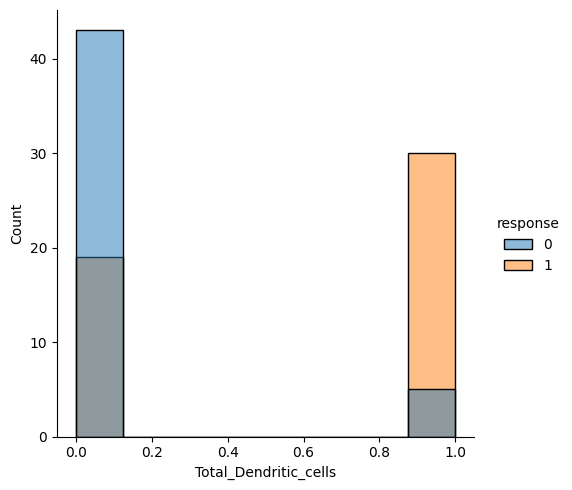

In [215]:
sns.displot(df_final, x='Total_Dendritic_cells', hue='response')

Также это может быть заметно из распределений по ответчикам и не ответчикам

In [213]:
immune_activation_response

['CD4_Naive_Tregs',
 'Eosinophils',
 'NKT_cells',
 'Neutrophils',
 'MAIT_cells',
 'CD8_Naive_T_cells',
 'CD8_Transitional_Memory',
 'CD4_Effector_Memory',
 'CD8_Central_Memory',
 'CD8_Effector_Memory',
 'CD4_Memory_Tregs',
 'CD4_Naive_T_cells']

Увеличение количества определенных популяций клеток (например, CD8+ T-клеток) говорит об активации иммунитета в ответ на лечение препаратом. Это может свидетельствовать о том, что препарат эффективно стимулирует иммунную систему для борьбы с опухолью.

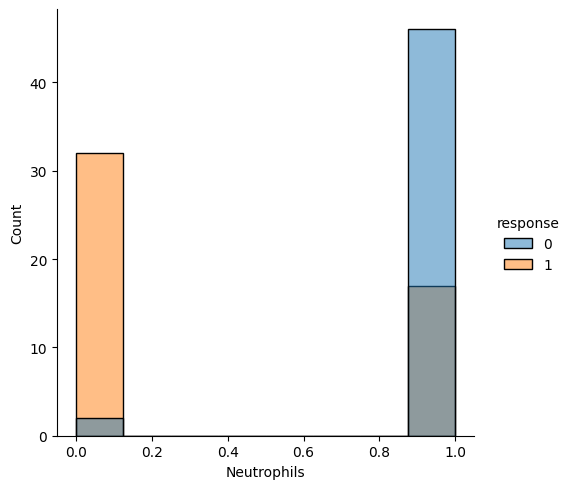

In [216]:
sns.displot(df_final, x='Neutrophils', hue='response')

Снижение количества нейтрофилов может указывать на иммуносупрессивный эффект препарата, который может быть полезен для предотвращения чрезмерного воспаления

In [212]:
immune_surveillance_memory

['Switched_Memory_IgG+',
 'B_cells',
 'Non-switched_Memory_IgM_B_cells',
 'Naive_B_cells',
 'Switched_Memory_IgA+']

In [211]:
nk_cells

['Immature_NK_cells']

immature NK cells участвуют во врожденном ответе иммунной системе, поэтому их изменение может быть свидетельством того, что врожденная иммуная система лучше распозновает и устраненяет раковые клетки. Посмотрим как разделились ответчик и не ответчики по их динамике

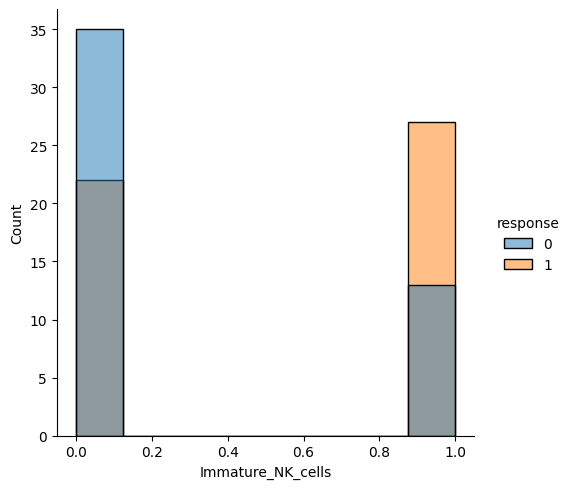

In [214]:
sns.displot(df_final, x='Immature_NK_cells', hue='response')

Видно, что у ответчиков и правда динамика положительная

In [210]:
other

['Monocytes_to_Lymphocytes', 'gdT_Vdelta2-']

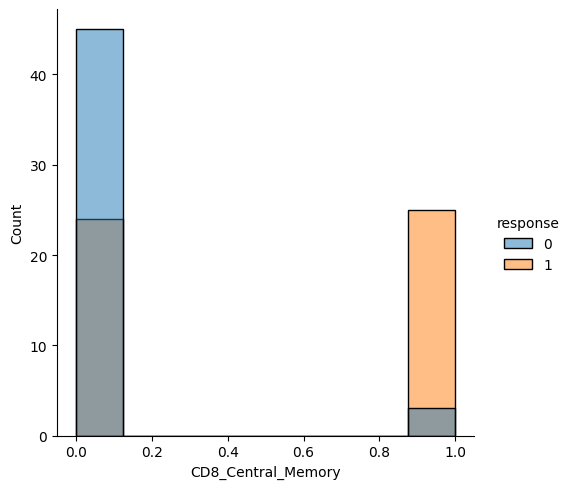

In [198]:
sns.displot(df_final, x='CD8_Central_Memory', hue='response')

# 2. Models development (Доп задание)

Попробуем выбрать наилучший набор фичей, которые наилучшим образом будут предсказывать респодентов. Выберем первый набор наилучших фичей, из предыдущих результатов однокомпонентных регрессий. На каждой итерации будем добавлять один из оставшихся предикторов и смотреть улучшиться или ухудшиться AUC. Если он ухудшится, то пропускаем фичу, если нет, то добавляем. В результате получим набор предикторов, наилучшим образом классифицирующих респодентов

In [230]:
def get_best_features_combination (dataset: pd.DataFrame, individual_auc_scores, n=5) :
    X = dataset.drop(columns=['response', 'donor_num'])
    y = dataset['response']

    selected_features = individual_auc_scores['name'][:n].to_list()
    remaining_features = individual_auc_scores['name'][n:].to_list()
    
    best_params = get_best_params (LogisticRegression, X[selected_features], y, log_param_grid)
    mod = LogisticRegression(penalty = best_params['penalty'],
                                     solver= best_params['solver'],
                                     C = best_params['C'])

    current_auc, current_lower, current_upper = evaluate_model(dataset, mod, X[selected_features], y)
    print(f"Initial AUC with top {n} features: {current_auc}, ci: {(current_lower, current_upper)}")

    for feature in tqdm (remaining_features):
        new_features = selected_features + [feature]
        new_best_params = get_best_params (LogisticRegression, X[new_features], y, log_param_grid)
        new_mod = LogisticRegression(penalty = new_best_params['penalty'],
                                     solver= new_best_params['solver'],
                                     C = new_best_params['C'])
        new_auc, new_lower, new_upper = evaluate_model(dataset, new_mod, X[new_features], y)
        if new_auc > current_auc:
            selected_features.append(feature)
            current_auc = new_auc
            current_lower = new_lower
            current_upper = new_upper
            mod = new_mod
            best_params = new_best_params

    print("Final selected features:", selected_features)
    print(f"Final AUC: {current_auc}, with ci: {(current_lower, current_upper)}")

In [182]:
res_ridge_aucs_final.head()

,name,coeff,metric,std
43,Memory_T_cells,3.017801,0.833763,0.091083
0,Neutrophils,-2.368054,0.820793,0.057327
23,CD4_Central_Memory,3.017801,0.817298,0.086903
4,T_cells,2.853946,0.808965,0.092759
24,CD4_Transitional_Memory,2.800128,0.803636,0.074144


In [231]:
get_best_features_combination (df_final, dynamic_scores_log, 4)

/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: C

Initial AUC with top 4 features: 0.9166888888888888, ci: (0.8983, 0.9343)


  0%|          | 0/46 [00:00<?, ?it/s]/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packag

Final selected features: ['Memory_T_cells', 'CD4_Central_Memory', 'Neutrophils', 'T_cells', 'Total_T_cells', 'CD8_Transitional_Memory', 'cDC2', 'CD4_Naive_T_cells', 'CD8_Central_Memory', 'Plasmacytoid_Dendritic_cells', 'Switched_Memory_IgA+']
Final AUC: 0.9790999999999999, with ci: (0.9714, 0.985)


In [232]:
log_best_scores_df1.head()

,name,coeff,metric,ci
28,CD8_Central_Memory,0.071169,0.685044,"(0.6663, 0.6984)"
15,cDC2,-0.019509,0.653067,"(0.6365, 0.6685)"
44,Total_Dendritic_cells,-0.024176,0.629222,"(0.6056, 0.644)"
14,cDC1,-0.000730,0.613267,"(0.6029, 0.6226)"
49,Monocytes_to_Lymphocytes,-0.010568,0.602044,"(0.5868, 0.6232)"


In [233]:
get_best_features_combination (df1, log_best_scores_df1, 3)

/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: C

Initial AUC with top 3 features: 0.7560222222222223, ci: (0.7355, 0.7707)


  0%|          | 0/8 [00:00<?, ?it/s]/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-package

Final selected features: ['CD8_Central_Memory', 'cDC2', 'Total_Dendritic_cells', 'cDC1', 'Mature_NK_CD158-_CD57-', 'MAIT_cells']
Final AUC: 0.7870444444444445, with ci: (0.7541, 0.817)


Получили набор со следующими предикторами как наилушчими: ['CD8_Central_Memory', 'cDC2', 'Total_Dendritic_cells', 'cDC1', 'Mature_NK_CD158-_CD57-', 'MAIT_cells'] <br>
Со следующим AUC: 0.7870444444444445, with ci: (0.7541, 0.817) <br>
Однако, стоит заметить, что 'cDC2', 'Total_Dendritic_cells', 'cDC1' можно сократить до Total_Dendritic_cells, без сильной потери качества, так как этот предиктор включает в себя информацию о 'cDC2' и 'cDC1'

In [250]:
best_features = ['CD8_Central_Memory', 'Total_Dendritic_cells', 'Mature_NK_CD158-_CD57-', 'MAIT_cells']
best_params = get_best_params (LogisticRegression, df1[best_features], df1['response'], log_param_grid)
ridge = LogisticRegression(penalty = best_params['penalty'],
                                     solver= best_params['solver'],
                                     C = best_params['C'])
new_auc, new_lower, new_upper = evaluate_model(df1, ridge, df1[best_features], df1['response'])

108596.91s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
108596.92s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
108596.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
108596.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
108596.95s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
108596.96s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
108596.97s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
108596.97s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Use

In [251]:
new_auc, new_lower, new_upper

(0.7675111111111111, 0.7471, 0.7907)

Как можно заметить модель получилась со схожим AUC в пределах доверительных интервалов

## Principal components as features

Попробуем построить модель по принципиальным компонентам, сравним, с тем что получилось с помощью backward feature selection

In [238]:
from sklearn.preprocessing import StandardScaler

pca = PCA(0.8)
pca_res = pca.fit_transform(StandardScaler().fit_transform(df1.loc[:, cols_only_predictors]))

In [239]:
pca_res.shape

(97, 13)

Посмотрим как респоденты разделяются по принципиальным компонентам

<Axes: >

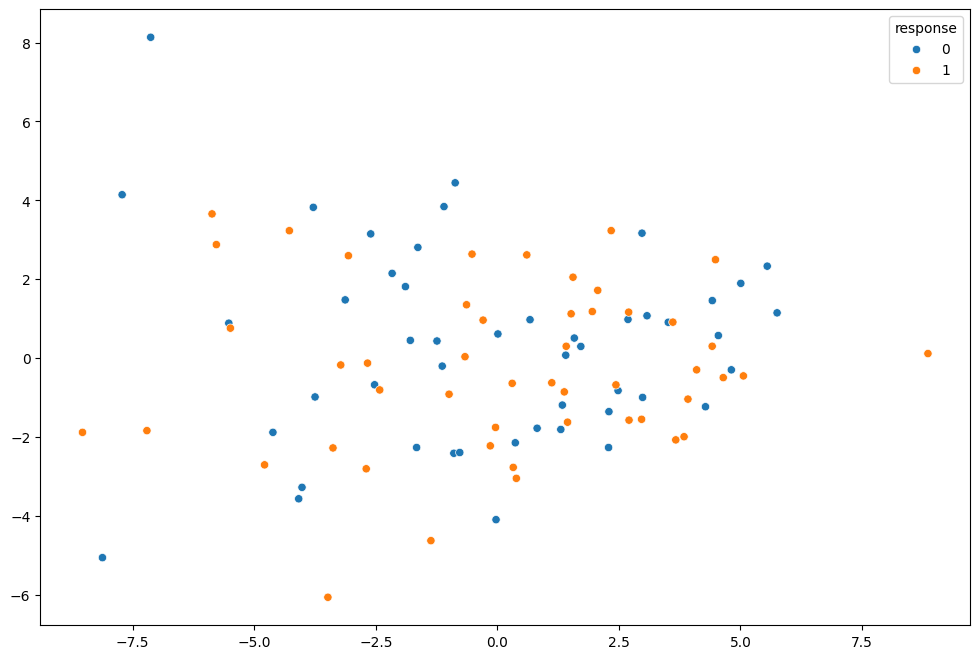

In [240]:
sns.scatterplot(x=pca_res[:,0], y=pca_res[:,1], hue=df1['response'])

<Axes: >

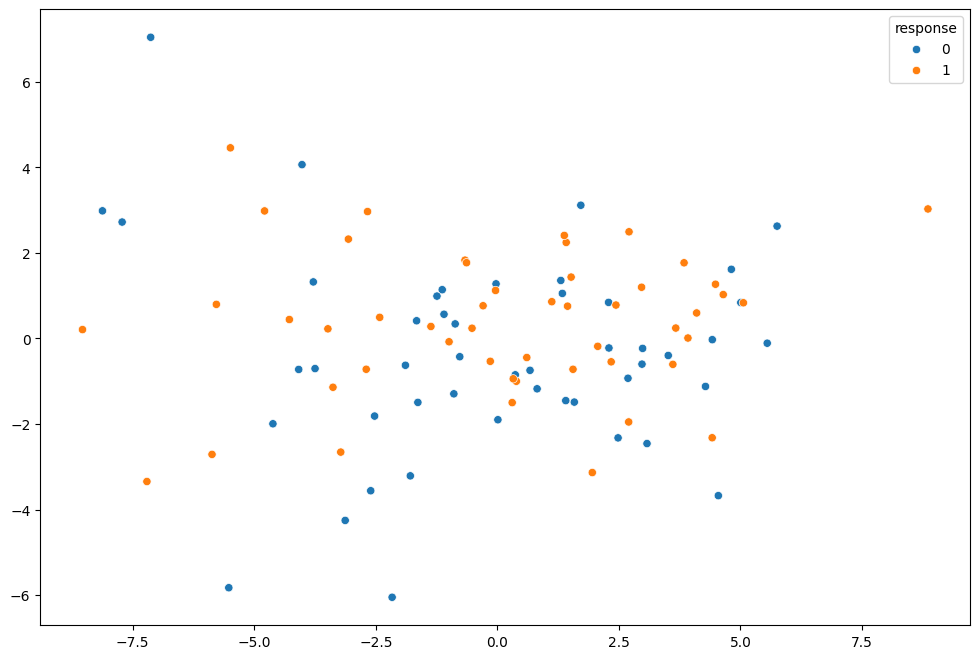

In [248]:
sns.scatterplot(x=pca_res[:,0], y=pca_res[:,2], hue=df1['response'])

<Axes: >

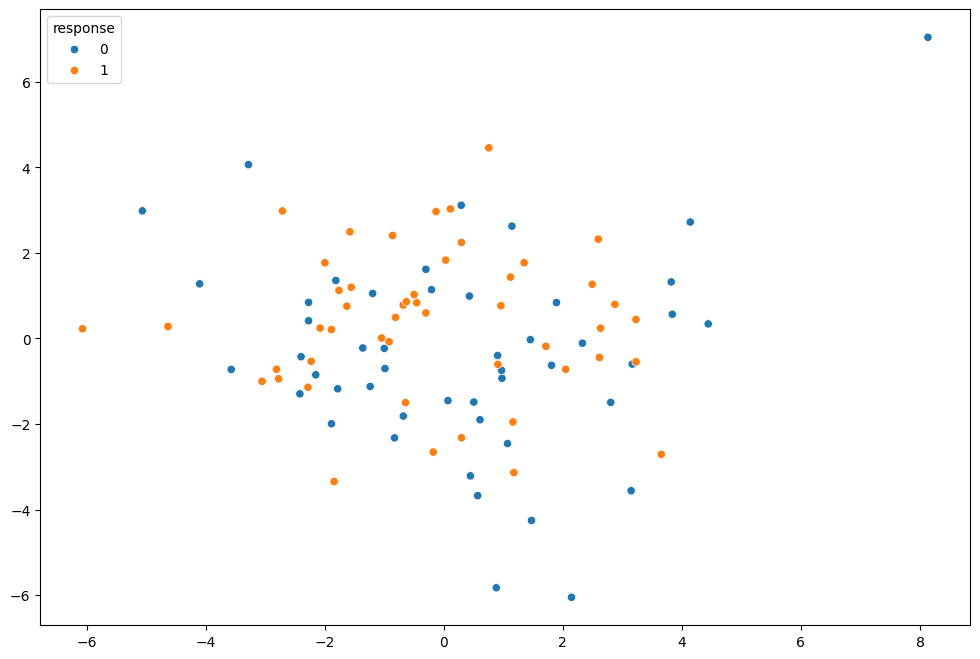

In [249]:
sns.scatterplot(x=pca_res[:,1], y=pca_res[:,2], hue=df1['response'])

Первые три компоненты значимого разделения не дали

In [246]:
y = df1['response']
best_params = get_best_params (LogisticRegression, pca_res, y, log_param_grid)
ridge = LogisticRegression(penalty = best_params['penalty'],
                         solver= best_params['solver'],
                         C = best_params['C'])
current_auc, lower_auc, upper_auc = evaluate_model(df1, ridge, pca_res, y)
print(f"{current_auc}, ci: {(lower_auc, upper_auc)}")

/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/glitchyhydra/work/projects/boston_gene_test/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: C

0.6145333333333334, ci: (0.5729, 0.6603)


In [247]:
print(f"{current_auc}, ci: {(lower_auc, upper_auc)}")

0.6145333333333334, ci: (0.5729, 0.6603)


видно, что модель на принципиальных компонентах получилась значительно хуже, чем та, что на самых значимых полученных с backward selection

# Possible model imporvement

1 выбрать лучшие переменные динамики <br>
2 выбрать лучшие переменные из первой точки, которые могут предсказать динамику <br>
3 попробовать предсказывать динамику измнения размера популяций по данным из первой точки, а затем уже по этим предсказаниям респодентов и не респодентов

Возможно также сделать StackedClassifier, я не успел его закончить, код снизу не рабочий

In [ ]:
def estimate_predictors_importance_stacked (dataset: pd.DataFrame, param_grid: dict) :
    metric_res = {
        'name' : [],
        #'coeff' : [],
        'metric' : [],
        'ci' : []
    }
    
    X = dataset.drop(columns=['response', 'donor_num'])
    y = dataset['response']
    best_params_xgb = get_best_params (XGBClassifier, X[col].to_numpy().reshape(-1, 1), y)
    best_params_log = get_best_params (LogisticRegression, X[col].to_numpy().reshape(-1, 1), y)
    

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for col in tqdm(X.columns) :
        x_col = X[col]
        base_models = [
            ('logit', LogisticRegression(penalty = best_params_log['penalty'],
                                         solver = best_params_log['solver'],
                                         C = best_params_log['C'])),
            ('xgb', XGBClassifier(max_depth = 2,
                            gamma = 2,
                            eta=0.8,
                        reg_alpha=0.5,
                        reg_lambda=0.5))
                        ]
        mod = StackingClassifier(estimators=base_models, 
                                 final_estimator=LogisticRegression(), cv=cv)
        #mod = LogisticRegression(penalty='l2', solver='liblinear', C=0.5)
        metric_res['name'].append (col)
        #mod_scores = cross_val_score(mod, x_col.to_numpy().reshape(-1, 1), y, cv=cv, scoring='roc_auc')
        auc, lower, upper = evaluate_model (dataset, mod, x_col, y)
        metric_res['metric'].append (auc)
        metric_res['ci'].append ((lower, upper))
        #metric_res['coeff'].append (mod_coef)
        
    return pd.DataFrame(metric_res).sort_values (by='metric', ascending=False)